## Car Prices Modeling

#### Problem Statement:

Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts

Essentially, the company wants —

- To understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Car Pricing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Spliting the Car Company from CarName

In [5]:
car['company'] = car['CarName'].str.split(" ", n = 1, expand = True)[0]
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [6]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
car.company = car.company.str.lower()

def replace_name(a,b):
    car.company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

Inspect the various aspects of the car dataframe

In [8]:
car.shape

(205, 26)

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [10]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Checking if there is any missing value / null values

In [11]:
round((car.isnull().sum()*100)/len(car.index), 2)

car_ID              0.0
symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
company             0.0
dtype: float64

Clearly, there are no missing values

## Step 2: Visualising the Data

**understanding the data**.
- To Check multicollinearity
- To identify if some predictors directly have a strong association with the outcome variable

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables
Draw Pairplot / Scatter Plot and HeatMap of numeric variables

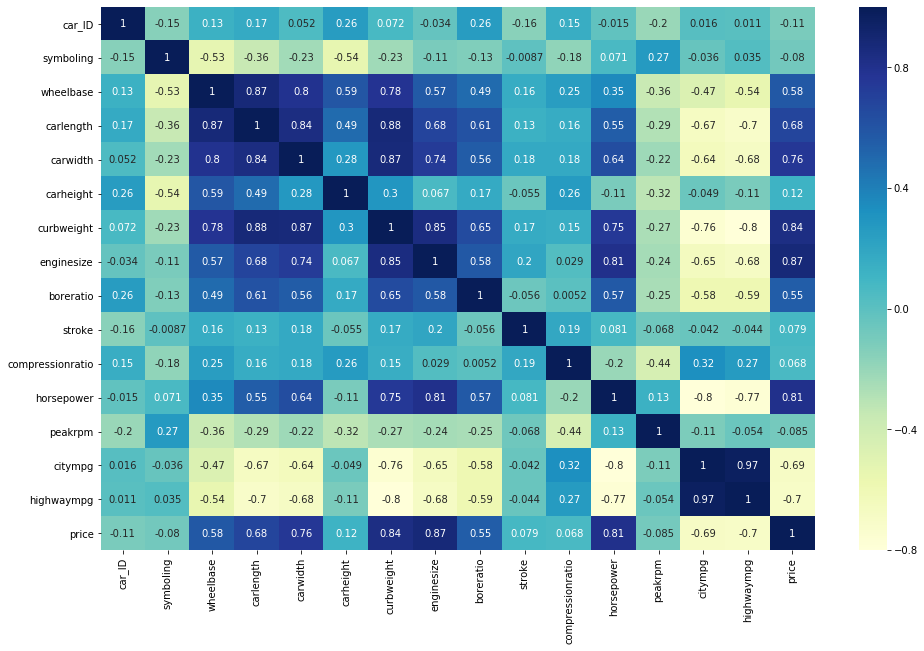

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Drawing Scatter and Pair plots with prices vs +ve and -ve independent variables as per above correlation HeatMap

In [14]:
def draw_scatter_plot(num, x_val):
    plt.subplot(4,3,num)
    plt.scatter(x = x_val, y = 'price', data = car)
    plt.title(x_val +' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x_val)

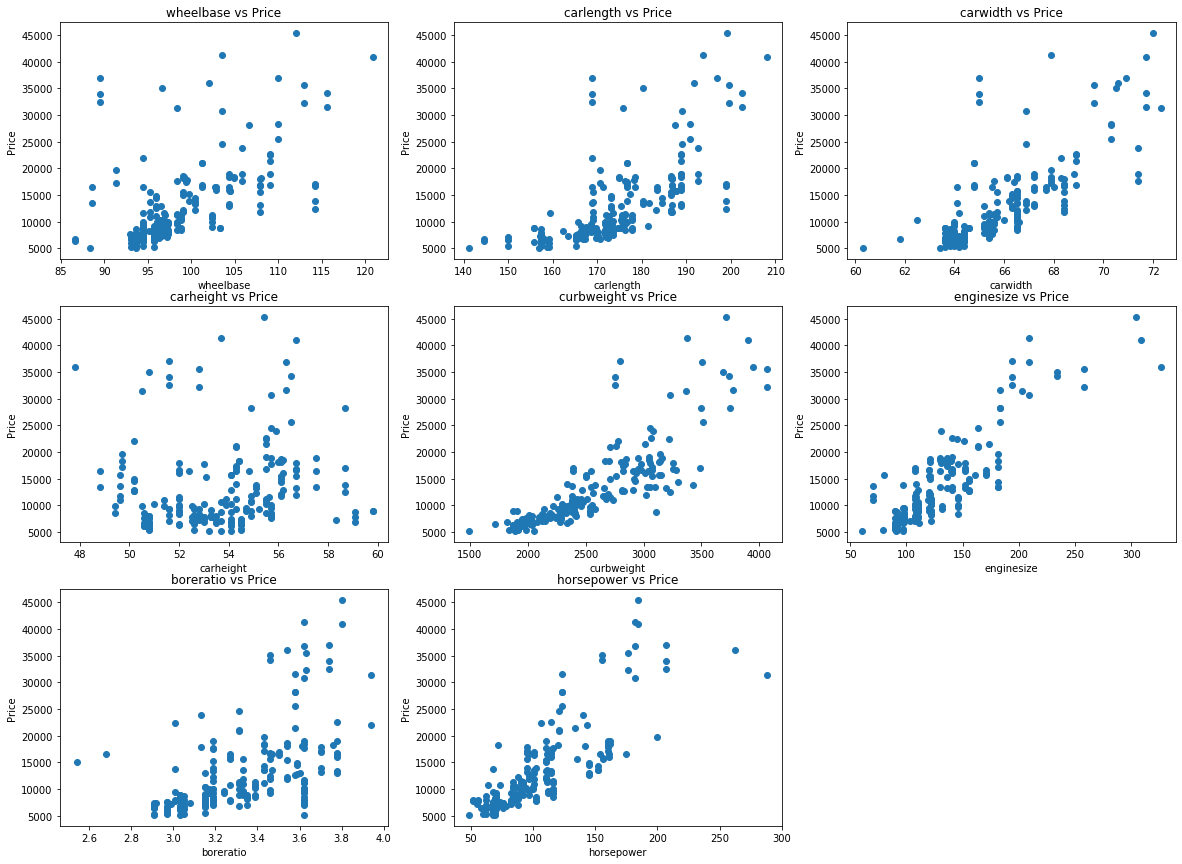

In [15]:
plt.figure(figsize=(20, 20))
draw_scatter_plot(1, 'wheelbase')
draw_scatter_plot(2, 'carlength')
draw_scatter_plot(3, 'carwidth')
draw_scatter_plot(4, 'carheight')
draw_scatter_plot(5, 'curbweight')
draw_scatter_plot(6, 'enginesize')
draw_scatter_plot(7, 'boreratio')
draw_scatter_plot(8, 'horsepower')

#### Observations 
1. Price has +ve correlation with wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower
2. Price doesn't seem to have correlation with carheight

In [16]:
def draw_pair_plots(x,y,z):
    sns.pairplot(car, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

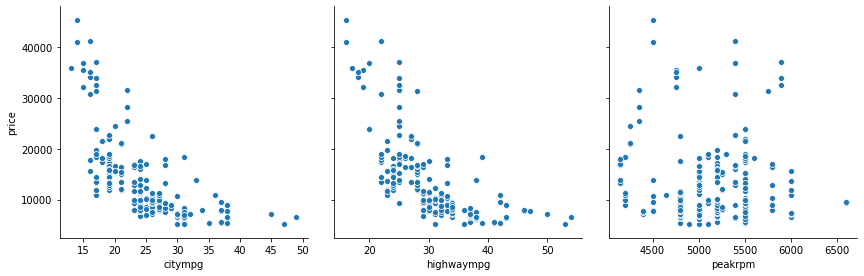

In [17]:
draw_pair_plots('citympg', 'highwaympg', 'peakrpm')

#### Observations
1. Price has -ve correlation with citympg and highwaympg
2. Price shows not correlation with peakrpm

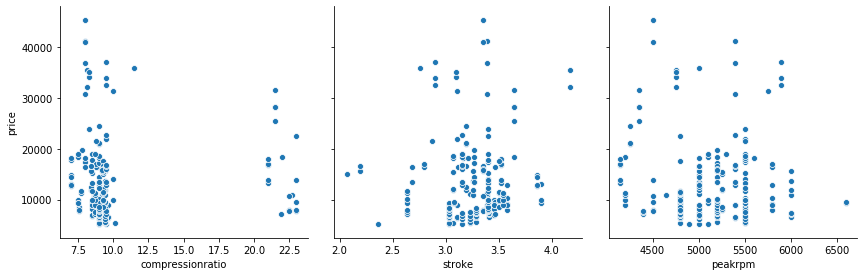

In [18]:
draw_pair_plots('compressionratio', 'stroke', 'peakrpm')

#### Observations 
1. Price doesn't show correlation with compressionratio and stroke

### Visualising Car Price Distribution

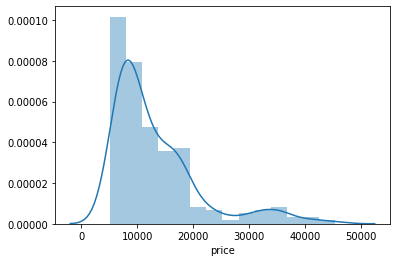

In [19]:
sns.distplot(car['price'])

### Visualising Categorical Variables

#### Drawing Count Plots

In [20]:
def draw_count_plot(num, x_val):    
    plt.subplot(4,3,num)
    ax = sns.countplot(x = x_val, data = car)
    for p in ax.patches:
         ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.title(x_val +' vs Count')
    #plt.ylabel('Price')
    plt.xlabel(x_val)

def draw_bar_plot(num, x_val):    
    plt.subplot(4,3,num)
    ax = sns.barplot(x = x_val, y = 'price', data = car)
    for p in ax.patches:
         ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
    plt.title(x_val +' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x_val)

    
    

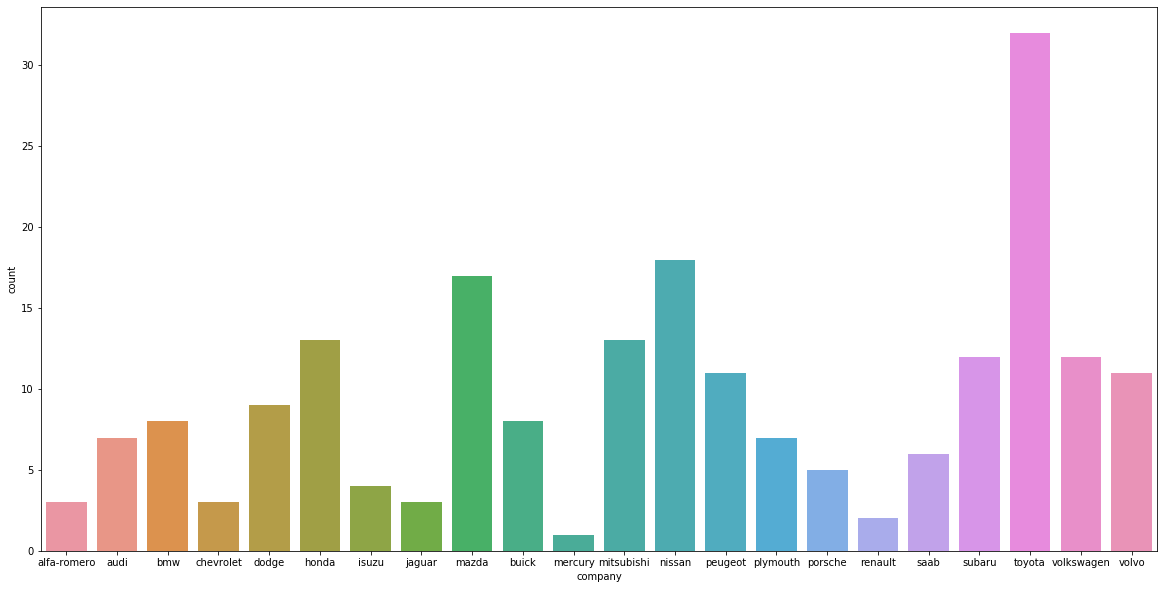

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(car['company'])

#### Observations 
1. Nissan, mazda has the highest Count
2. Mercury has the least Count

#### Drawing Count Plots

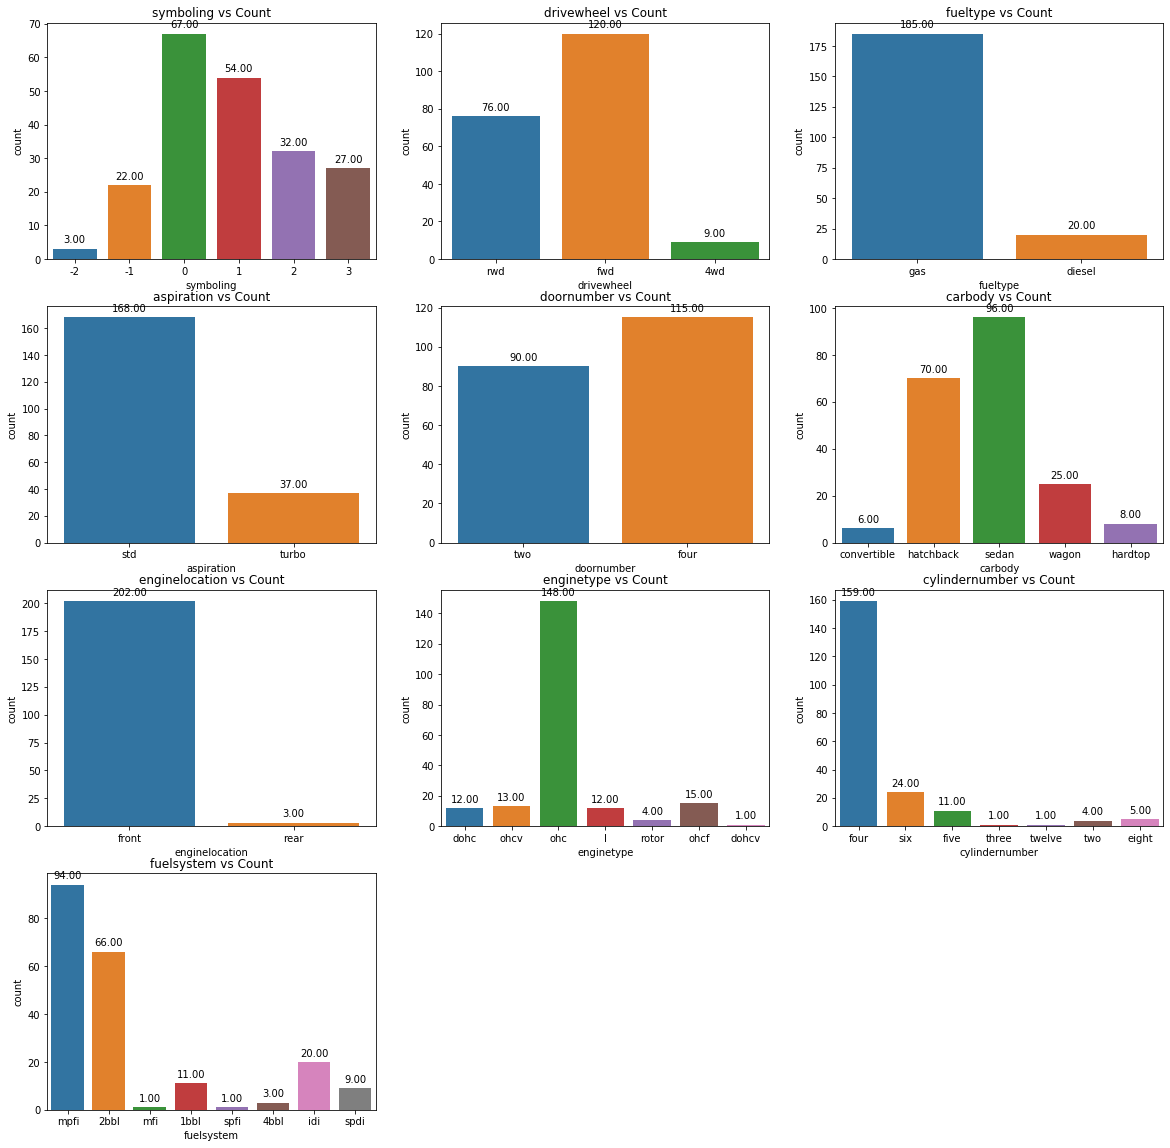

In [22]:
plt.figure(figsize=(20, 20))
draw_count_plot(1,'symboling')
draw_count_plot(2,'drivewheel')
draw_count_plot(3,'fueltype')
draw_count_plot(4,'aspiration')
draw_count_plot(5,'doornumber')
draw_count_plot(6,'carbody')
draw_count_plot(7,'enginelocation')
draw_count_plot(8,'enginetype')
draw_count_plot(9,'cylindernumber')
draw_count_plot(10,'fuelsystem')

#### Observations
Highest Counts is for variables 
1. symboling = 0
2. drivewheel = fwd
3. fueltype = gas
4. aspiration = std
5. doornumber = four
6. carbody = sedan
7. enginelocation = front (It has only 3 values for rear)
8. enginetype = ohc
9. cylindernumber = four
10. fuelsystem = mpfi

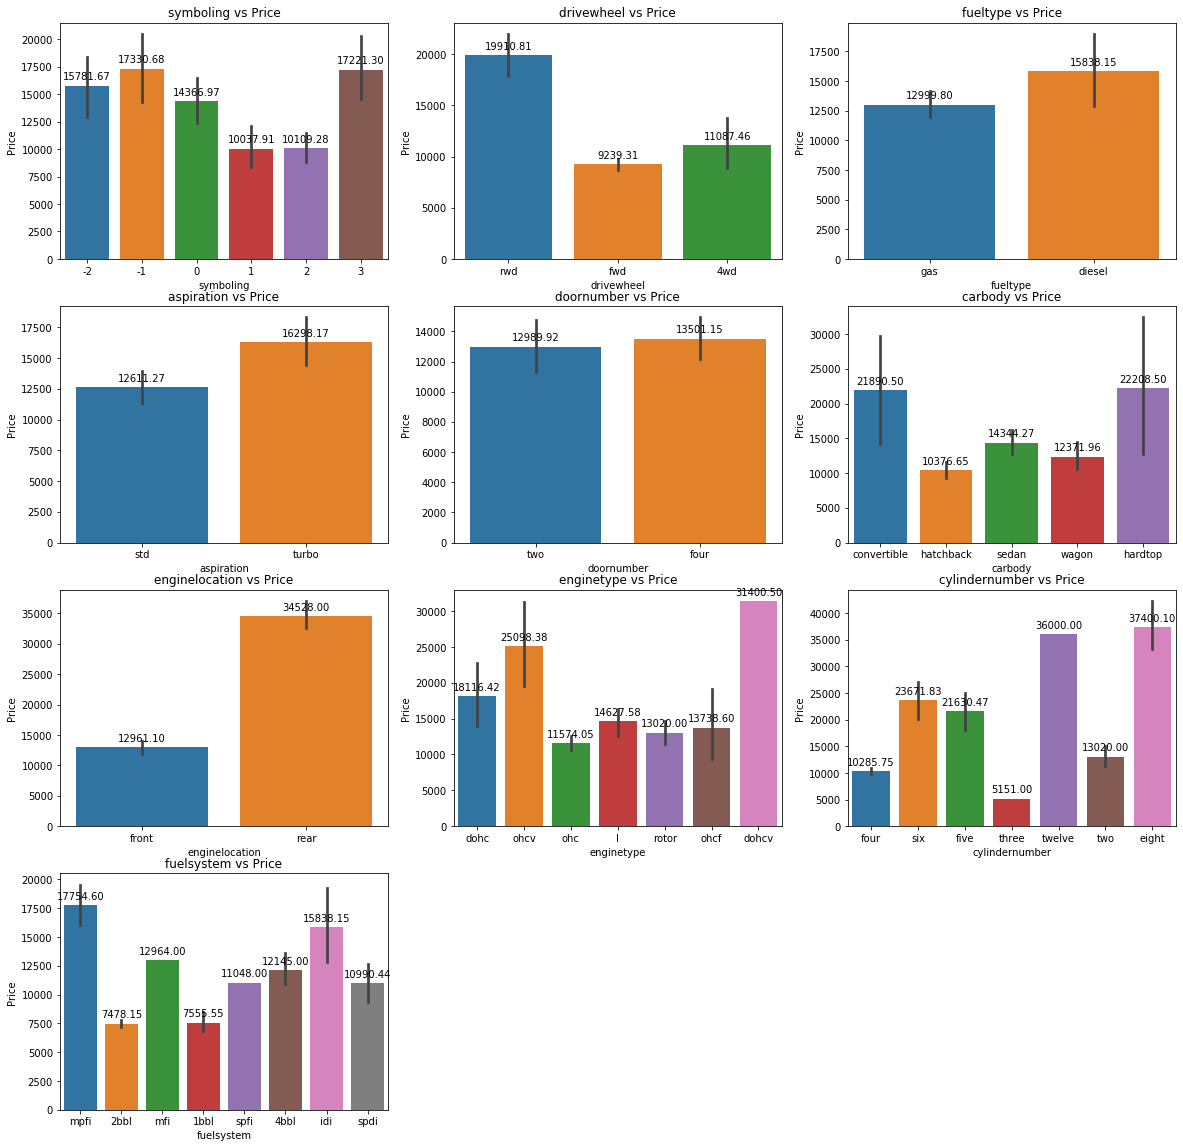

In [23]:
plt.figure(figsize=(20, 20))
draw_bar_plot(1,'symboling')
draw_bar_plot(2,'drivewheel')
draw_bar_plot(3,'fueltype')
draw_bar_plot(4,'aspiration')
draw_bar_plot(5,'doornumber')
draw_bar_plot(6,'carbody')
draw_bar_plot(7,'enginelocation')
draw_bar_plot(8,'enginetype')
draw_bar_plot(9,'cylindernumber')
draw_bar_plot(10,'fuelsystem')

#### Observations
Highest Mean Price is for variables 
1. symboling = -1
2. drivewheel = rwd
3. fueltype = diesel
4. aspiration = turbo
5. doornumber = four
6. carbody = hardtop
7. enginelocation = rear 
8. enginetype = ohc
9. cylindernumber = dohcv
10. fuelsystem = mpfi

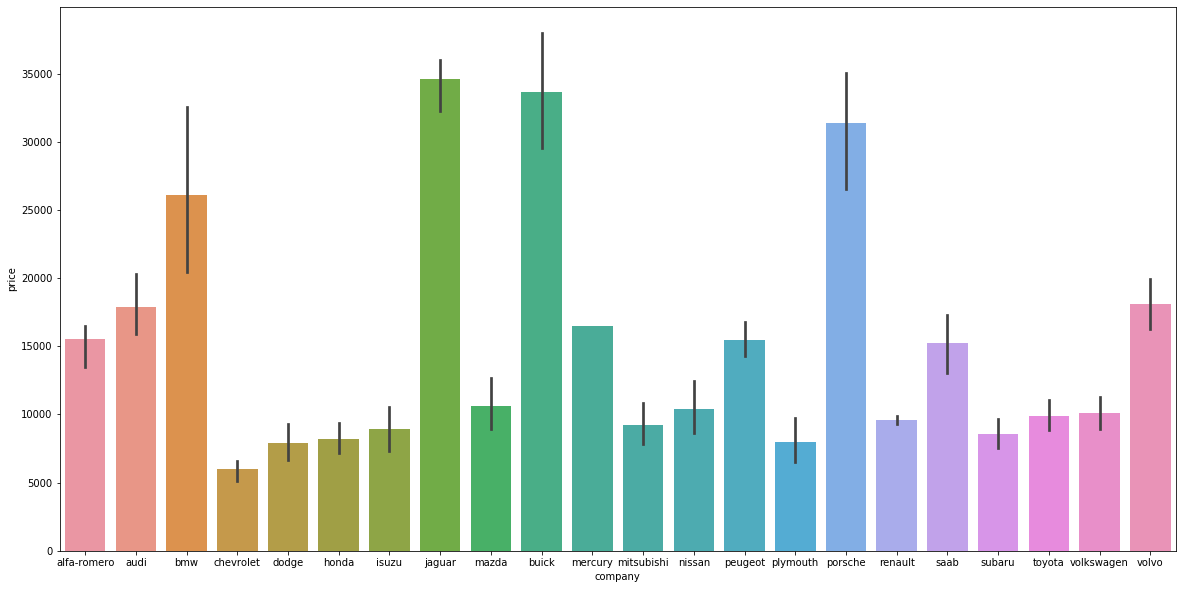

In [24]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'company', y = 'price', data=car)

#### Observations
Highest Mean Price is for Company Jaguar, buick 

### List of Independent variables to consider after Numerical & Categorical Variables Analysis

#### Numerical Variables 

- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower
- citympg
- highwaympg

#### Categorical Variables

- drivewheel 
- fueltype 
- aspiration
- doornumber
- carbody
- enginelocation 
- enginetype 
- cylindernumber
- fuelsystem
- company

## Step 3 : Filtering Variable for Regression 

In [25]:
car_lr = car[['price', 'wheelbase', 'carlength','carwidth', 'curbweight','enginesize',
                  'boreratio', 'horsepower', 'citympg', 'highwaympg','drivewheel', 
                    'fueltype', 'aspiration','doornumber', 'carbody', 'enginelocation', 'enginetype','cylindernumber'
               ,'fuelsystem','company']]
car_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel,fueltype,aspiration,doornumber,carbody,enginelocation,enginetype,cylindernumber,fuelsystem,company
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,rwd,gas,std,two,convertible,front,dohc,four,mpfi,alfa-romero
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,rwd,gas,std,two,convertible,front,dohc,four,mpfi,alfa-romero
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,rwd,gas,std,two,hatchback,front,ohcv,six,mpfi,alfa-romero
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,fwd,gas,std,four,sedan,front,ohc,four,mpfi,audi
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,4wd,gas,std,four,sedan,front,ohc,five,mpfi,audi


### Handling Categorical Dummy Variables

In [26]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

car_lr = dummies('drivewheel',car_lr)
car_lr = dummies('fueltype',car_lr)
car_lr = dummies('aspiration',car_lr)
car_lr = dummies('doornumber',car_lr)
car_lr = dummies('carbody',car_lr)
car_lr = dummies('enginelocation',car_lr)
car_lr = dummies('enginetype',car_lr)
car_lr = dummies('cylindernumber',car_lr)
car_lr = dummies('fuelsystem',car_lr)
car_lr = dummies('company',car_lr)

In [27]:
car_lr.shape

(205, 60)

#### Splitting Train and Test Data

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 70)

In [30]:
car_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fwd,rwd,gas,turbo,two,hardtop,hatchback,sedan,wagon,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Rescaling Features
- wheelbase, carlength, carwidth, curbweight, enginesize, boreration, horsepower, citympg, highwaympg, price 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
            'horsepower', 'citympg', 'highwaympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fwd,rwd,gas,turbo,two,hardtop,hatchback,sedan,wagon,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.068818,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,0.466890,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.122110,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.314446,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.382131,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
df_train.describe()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fwd,rwd,gas,turbo,two,hardtop,hatchback,sedan,wagon,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,0.374976,0.594406,0.349650,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.215682,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,0.188477,0.492733,0.478536,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,0.216216,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,0.378378,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,0.527027,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00

### Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('price')
X_train = df_train

## Step 4 : Building our model

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 7),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 8),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('citympg', False, 25),
 ('highwaympg', True, 1),
 ('fwd', False, 39),
 ('rwd', False, 24),
 ('gas', False, 38),
 ('turbo', False, 29),
 ('two', False, 41),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 17),
 ('ohc', False, 32),
 ('ohcf', False, 13),
 ('ohcv', False, 33),
 ('rotor', True, 1),
 ('five', False, 18),
 ('four', False, 12),
 ('six', False, 21),
 ('three', False, 5),
 ('twelve', False, 4),
 ('two', False, 11),
 ('2bbl', False, 40),
 ('4bbl', False, 23),
 ('idi', False, 35),
 ('mfi', False, 44),
 ('mpfi', False, 22),
 ('spdi', False, 28),
 ('spfi', False, 43),
 ('audi', False, 2),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 36),
 ('dodge', False, 27),
 ('honda', False, 20),
 ('isuz

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'highwaympg', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear', 'dohcv', 'rotor', 'bmw', 'buick',
       'jaguar', 'porsche'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'enginesize', 'boreratio', 'citympg', 'fwd',
       'rwd', 'gas', 'turbo', 'two', 'l', 'ohc', 'ohcf', 'ohcv', 'five',
       'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X_train_rfe,y_train):
    X_train_rfe = sm.add_constant(X_train_rfe) #Adding the constant
    lm = sm.OLS(y_train,X_train_rfe).fit() 
    print(lm.summary()) # model summary
    return X_train_rfe
    
def calc_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [42]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     130.1
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.18e-69
Time:                        23:32:49   Log-Likelihood:                 216.82
No. Observations:                 143   AIC:                            -401.6
Df Residuals:                     127   BIC:                            -354.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0968      0.044     -2.179      0.0

In [43]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,88.80
7,sedan,11.01
6,hatchback,10.05
2,curbweight,9.46
3,horsepower,6.16
1,carwidth,6.08
8,wagon,5.45
4,highwaympg,4.47
15,porsche,3.13
9,rear,2.69


`dohcv` is insignificant in presence of other variables; can be dropped

In [44]:
X_train_rfe = X_train_rfe.drop(["dohcv"], axis = 1)

### Model 2

In [45]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     137.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           6.41e-70
Time:                        23:32:49   Log-Likelihood:                 215.40
No. Observations:                 143   AIC:                            -400.8
Df Residuals:                     128   BIC:                            -356.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0782      0.043     -1.813      0.0

In [46]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,82.72
7,sedan,10.98
6,hatchback,10.00
2,curbweight,9.29
1,carwidth,5.98
8,wagon,5.45
3,horsepower,5.01
4,highwaympg,4.01
5,hardtop,2.29
14,porsche,2.22


In [47]:
X_train_rfe = X_train_rfe.drop(["porsche"], axis = 1)

`porsche` is insignificant in presence of other variables; can be dropped

### Model 3

In [48]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.58e-70
Time:                        23:32:49   Log-Likelihood:                 213.23
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     129   BIC:                            -357.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1005      0.042     -2.388      0.0

In [49]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,77.09
7,sedan,10.93
6,hatchback,9.99
2,curbweight,8.93
1,carwidth,5.56
8,wagon,5.45
3,horsepower,4.07
4,highwaympg,3.71
5,hardtop,2.29
9,rear,1.65


In [50]:
X_train_rfe = X_train_rfe.drop(["rotor"], axis = 1)

`rotor` is insignificant in presence of other variables; can be dropped

### Model 4

In [51]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     151.1
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.80e-70
Time:                        23:32:49   Log-Likelihood:                 210.35
No. Observations:                 143   AIC:                            -394.7
Df Residuals:                     130   BIC:                            -356.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0780      0.042     -1.873      0.0

In [52]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,72.93
7,sedan,10.89
6,hatchback,9.81
2,curbweight,8.74
1,carwidth,5.56
8,wagon,5.44
3,horsepower,4.01
4,highwaympg,3.20
5,hardtop,2.29
9,rear,1.65


In [53]:
X_train_rfe = X_train_rfe.drop(["highwaympg"], axis = 1)

`highwaympg` is insignificant in presence of other variables; can be dropped

### Model 5

In [54]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.00e-70
Time:                        23:32:49   Log-Likelihood:                 208.22
No. Observations:                 143   AIC:                            -392.4
Df Residuals:                     131   BIC:                            -356.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0255      0.032     -0.786      0.4

In [55]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,43.47
6,sedan,10.65
5,hatchback,9.62
2,curbweight,7.82
1,carwidth,5.56
7,wagon,5.39
3,horsepower,3.50
4,hardtop,2.26
8,rear,1.64
10,buick,1.48


In [56]:
X_train_rfe = X_train_rfe.drop(["hardtop"], axis = 1)

`hardtop` is insignificant in presence of other variables; can be dropped

### Model 6

In [57]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.31e-70
Time:                        23:32:49   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0632      0.028     -2.295      0.0

In [58]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,30.38
2,curbweight,7.80
5,sedan,7.21
4,hatchback,6.51
1,carwidth,5.52
6,wagon,3.87
3,horsepower,3.49
9,buick,1.45
10,jaguar,1.42
7,rear,1.29


In [59]:
X_train_rfe = X_train_rfe.drop(["sedan"], axis = 1)

`sedan` is insignificant in presence of other variables, also having VIF > 5; can be dropped

### Model 7

In [60]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.6
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.74e-70
Time:                        23:32:49   Log-Likelihood:                 202.65
No. Observations:                 143   AIC:                            -385.3
Df Residuals:                     133   BIC:                            -355.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1156      0.018     -6.554      0.0

In [61]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,12.03
2,curbweight,7.71
1,carwidth,5.15
3,horsepower,3.42
8,buick,1.40
9,jaguar,1.40
4,hatchback,1.33
5,wagon,1.27
6,rear,1.19
7,bmw,1.17


In [62]:
X_train_rfe = X_train_rfe.drop(["hatchback"], axis = 1)

`hatchback` is insignificant in presence of other variables; can be dropped

### Model 8

In [63]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     205.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.75e-71
Time:                        23:32:49   Log-Likelihood:                 201.73
No. Observations:                 143   AIC:                            -385.5
Df Residuals:                     134   BIC:                            -358.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1264      0.016     -8.095      0.0

In [64]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,9.38
2,curbweight,7.42
1,carwidth,5.13
3,horsepower,3.09
7,buick,1.40
8,jaguar,1.39
4,wagon,1.22
5,rear,1.15
6,bmw,1.13


In [65]:
X_train_rfe = X_train_rfe.drop(["wagon"], axis = 1)

`wagon` is insignificant in presence of other variables; can be dropped

### Model 9

In [66]:
X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     229.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           1.13e-71
Time:                        23:32:49   Log-Likelihood:                 199.73
No. Observations:                 143   AIC:                            -383.5
Df Residuals:                     135   BIC:                            -359.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1295      0.016     -8.251      0.0

In [67]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,9.28
2,curbweight,6.21
1,carwidth,4.83
3,horsepower,2.93
6,buick,1.39
7,jaguar,1.34
4,rear,1.15
5,bmw,1.10


In [68]:
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)

`curbweight` is insignificant in presence of other variables also have VIF > 5; can be dropped

### Model 10

In [69]:

X_train_rfe = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     242.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           5.02e-70
Time:                        23:32:49   Log-Likelihood:                 192.73
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     136   BIC:                            -350.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1293      0.016     -7.872      0.0

In [70]:
calc_VIF(X_train_rfe)

,Features,VIF
0,const,9.28
1,carwidth,2.56
2,horsepower,2.51
5,buick,1.32
6,jaguar,1.21
3,rear,1.15
4,bmw,1.07


### This Model is acceptable since all p values are zero and VIF < 5

## Step 5 : Residual Analysis of the train data

To Check if the error terms are also normally distributed, Plotting the histogram of the error terms

In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()
y_train_price = lm.predict(X_train_rfe)

In [72]:
y_train_price.head()

122    0.045570
125    0.356497
166    0.130434
1      0.132684
199    0.345714
dtype: float64

Text(0.5, 0, 'Errors')

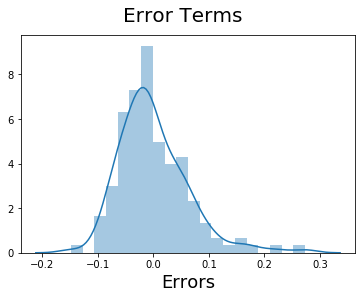

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6 : Making Predictions

#### Applying the scaling on the test sets

In [74]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
            'horsepower', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [75]:
y_test = df_test.pop('price')
X_test = df_test

In [76]:
X_train_rfe.columns

Index(['const', 'carwidth', 'horsepower', 'rear', 'bmw', 'buick', 'jaguar'], dtype='object')

In [77]:
# Now let's use our model to make predictions.
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 7 : Model Evaluation

Text(0, 0.5, 'y_pred')

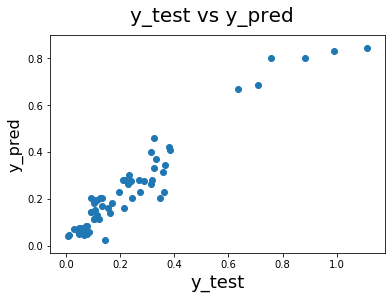

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Calculate r2_Score

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9145698491436336

### Observations

1. R-squared and Adjusted R-squared (goodness of fit) - 0.914 and 0.911 - 91% variance is explained by model.
2. F-stats and Prob(F-stats) (overall model fit) - 242.3 and 5.02e-70 - Model fit is significant and explained 91% variance is just not by chance.
3. p-values for all the coefficients seem to be less than the significance level of 0.05, i.e. all the predictors are statistically significant.


We can see that the equation of our best fitted line is:

$ price = 0.4797  \times  carwidth + 0.4193  \times  horsepower + 0.4623 \times rear + 0.3180 \times bmw + 0.2652 \times buick + 0.2850 \times jaguar -0.1293 $
